In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from ucimlrepo import fetch_ucirepo 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer


In [206]:

base_path= '/home/mr-arthor/Desktop/CDAC/Practical_Machine_Learning/Lab_Work/Datasets'


In [207]:
df_email = pd.read_csv(base_path + '/Spam Email.csv')


In [208]:
def eda(df, target, type='a'):  # Exploratory Data Analysis
    from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.model_selection import train_test_split
    


    # Display unique label count
    unique_count = df[target].nunique()
    print("Label Count =", unique_count)

    # Type 'a': Standard preprocessing
    if type == 'a':
        for col in df.select_dtypes(include=['object']).columns:
            label_encoder = LabelEncoder()
            df[col] = label_encoder.fit_transform(df[col])
        # Handle missing values
        print(df.isnull().sum())
        df.fillna(df.mean(), inplace=True)  
        x = df.drop(columns=[target])
        y = df[target]
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

        # Apply StandardScaler and MinMaxScaler
        sc = StandardScaler()
        x_train = sc.fit_transform(x_train)
        x_test = sc.transform(x_test)

        scaler = MinMaxScaler()
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.transform(x_test)

        print(df.shape)
        return x_train, x_test, y_train, y_test

    # Type 'b': CountVectorizer for text data

    if type == 'b':
        df.dropna(inplace=True)
        x = df[target].astype(str)  # Use only the text column for vectorization
        y = df[target]

        # Ensure labels are categorical
        if not y.dtype == 'object':
            label_encoder = LabelEncoder()
            y = label_encoder.fit_transform(y)

        x_train_raw, x_test_raw, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
        
        vectorizer = CountVectorizer(binary=True)
        x_train = vectorizer.fit_transform(x_train_raw)
        x_test = vectorizer.transform(x_test_raw)

        return x_train, x_test, y_train, y_test


In [209]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Example dataset
texts = ["I love programming", "Python is great", "I hate bugs", "Debugging is fun"]
labels = [1, 1, 0, 1]  # 1: Positive, 0: Negative

# Split the data
x_train, x_test, y_train, y_test = train_test_split(texts, labels, test_size=0.25, random_state=42)

# Vectorize the text
vectorizer = CountVectorizer(binary=True)
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

# Train Naive Bayes model
model = MultinomialNB()
model.fit(x_train_vec, y_train)

# Predict and evaluate
y_pred = model.predict(x_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [210]:
# def eda(df,target,type='a'): #Exploratory Data Analysis 
#     print(df.shape)
#     print(df.isnull().sum())    
#     unique_count = df[target].nunique()
#     print("Label COunt = ",unique_count)
   

#     for col in df.select_dtypes(include=['object']).columns:
#         label_encoder = LabelEncoder()
#         df[col] = label_encoder.fit_transform(df[col])
#     print(df.head())
#     print(df.cov())
#     df.fillna(df.mean(), inplace=True)
                  
#     print(df.shape)
#     df.head()
 
#     # sns.pairplot(df)
#     # x = df.iloc[:, :q]
#     # y = df.iloc[:, q]
#     x=df.drop(columns=[target])
#     y=df[target]

#     print(x.head())
#     print(y.head())
#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)    
#     sc = StandardScaler()
#     x_train = sc.fit_transform(x_train)
#     x_test = sc.transform(x_test)
#     scaler = MinMaxScaler()
#     x_train = scaler.fit_transform(x_train)
#     x_test = scaler.transform(x_test)
#     print(x_train)
#     print(x_test)
#     return x_train, x_test, y_train, y_test  


In [211]:
def Bernauli( x_train, x_test,y_train, y_test):
    classifier = BernoulliNB()
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print("Accuracy Of Model is",accuracy_score(y_test, y_pred,))
    print(classification_report(y_test, y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot()
    plt.show()


In [212]:
def Multinomial( x_train, x_test,y_train, y_test):
    classifier = MultinomialNB()
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print("Accuracy Of MOdel is",accuracy_score(y_test, y_pred,))
    print(classification_report(y_test, y_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot()
    plt.show()  


In [213]:
def GaussianN(x_train, x_test,y_train, y_test):
    classifier = GaussianNB()
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print("Accuracy Of MOdel is",accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred,))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot()
    plt.show()


In [214]:
df_email.head()


,ID,Mail,Text,Label
0,1,ham,Subject: christmas tree farm pictures\r\n,0
1,2,ham,"Subject: vastar resources , inc .\r\ngary , pr...",0
2,3,ham,Subject: calpine daily gas nomination\r\n- cal...,0
3,4,ham,Subject: re : issue\r\nfyi - see note below - ...,0
4,5,ham,Subject: meter 7268 nov allocation\r\nfyi .\r\...,0


In [215]:
x_train, x_test, y_train, y_test = eda(df_email,'Label','a')


Label Count = 2
ID       0
Mail     0
Text     0
Label    0
dtype: int64
(5171, 4)


[[739   0]
 [  0 296]]
Accuracy Of Model is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       739
           1       1.00      1.00      1.00       296

    accuracy                           1.00      1035
   macro avg       1.00      1.00      1.00      1035
weighted avg       1.00      1.00      1.00      1035



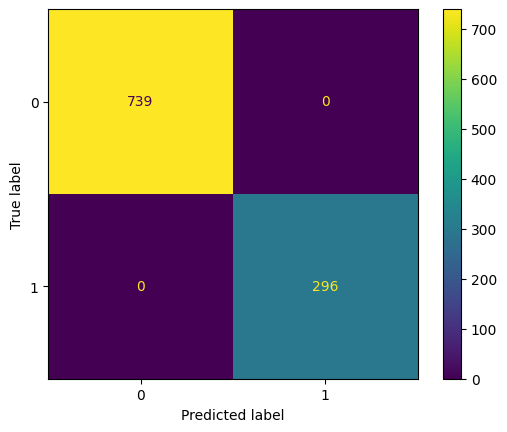

In [216]:
Bernauli(x_train, x_test, y_train, y_test)


In [217]:
df_news = pd.read_csv(base_path + '/BBC News Train.csv')


In [218]:
df_news.head()


,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business
2,1101,bbc poll indicates economic gloom citizens in ...,business
3,1976,lifestyle governs mobile choice faster bett...,tech
4,917,enron bosses in $168m payout eighteen former e...,business


In [219]:
x_train, x_test, y_train, y_test = eda(df_news,'Category','a')


Label Count = 5
ArticleId    0
Text         0
Category     0
dtype: int64
(1490, 3)


In [220]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)


In [221]:
df_news = pd.DataFrame({'data': newsgroups.data, 'target': newsgroups.target})


In [222]:
x_train, x_test, y_train, y_test = eda(df_news,'target','a')


Label Count = 20
data      0
target    0
dtype: int64
(18846, 2)


[[  0   0   0   0  51   0   0   3  11  84   0   0   0   0   0  14   0   0
    0   0]
 [  0   0   0   0  34   0   0   4  18 100   0   0   0   0   0  34   0   0
    0   0]
 [  0   0   0   0  34   0   0   5  22 109   0   0   0   0   0  30   0   0
    0   0]
 [  0   0   0   0  39   0   0   2  39  88   0   0   0   0   0  28   0   0
    0   0]
 [  0   0   0   0  55   0   0   3  35  72   0   0   0   0   0  36   0   0
    0   0]
 [  0   0   0   0  41   0   0   2  30  99   0   0   0   0   0  26   0   0
    0   0]
 [  0   0   0   0  41   0   0   9  40  84   0   0   0   0   0  32   0   0
    0   0]
 [  0   0   0   0  36   0   0   0  33  83   0   0   0   0   0  25   0   0
    0   0]
 [  0   0   0   0  29   0   0   4  35  96   0   0   0   0   0  25   0   0
    0   0]
 [  0   0   0   0  21   0   0   6  21 102   0   0   0   0   0  21   0   0
    0   0]
 [  0   0   0   0  46   0   0   7  57  87   0   0   0   0   0  36   0   0
    0   0]
 [  0   0   0   0  40   0   0   0  34 103   0   0   0   0   0  13

/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


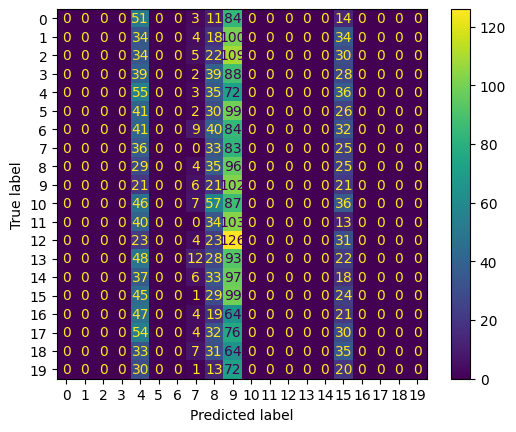

In [223]:
GaussianN(x_train, x_test, y_train, y_test)


In [224]:
df_Customer = pd.read_csv(base_path + '/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')


In [225]:
df_Customer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   b

In [226]:
df_Customer.drop(['id','dateAdded','dateUpdated','asins','brand','categories','primaryCategories','imageURLs','keys','reviews.dateSeen','reviews.id','reviews.sourceURLs','sourceURLs'],axis=1,inplace=True)


In [227]:
df_Customer.dropna(inplace=True)


In [228]:
x_train, x_test, y_train, y_test = eda(df_Customer,'reviews.rating')


Label Count = 5
name                   0
manufacturer           0
manufacturerNumber     0
reviews.date           0
reviews.dateAdded      0
reviews.doRecommend    0
reviews.numHelpful     0
reviews.rating         0
reviews.text           0
reviews.title          0
reviews.username       0
dtype: int64
(1052, 11)


[[  0   0   0   0   2]
 [  0   0   0   0   1]
 [  0   0   0   0   5]
 [  0   0   0   0  48]
 [  0   0   0   0 155]]
Accuracy Of MOdel is 0.7345971563981043
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        48
           5       0.73      1.00      0.85       155

    accuracy                           0.73       211
   macro avg       0.15      0.20      0.17       211
weighted avg       0.54      0.73      0.62       211



/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/mr-arthor/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


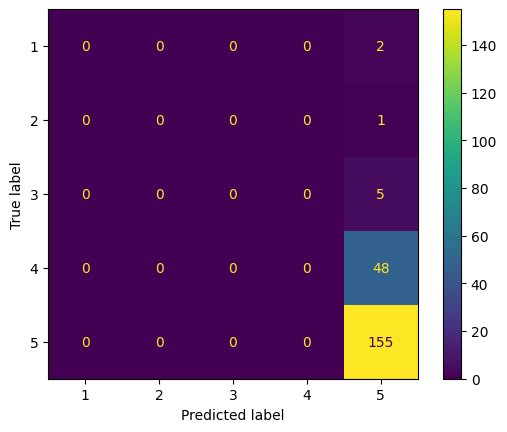

In [229]:
Multinomial(x_train, x_test, y_train, y_test)


In [230]:
df_weather = pd.read_csv(base_path + '/weatherHistory.csv')


In [231]:
df_weather.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [232]:
x_train, x_test, y_train, y_test = eda(df_weather,'Summary')


Label Count = 27
Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64
(96453, 12)


In [233]:

# Multinomial(x_train, x_test, y_train, y_test)


In [234]:
df_language = pd.read_csv(base_path + '/Language Detection.csv')


In [235]:
df_language.head()


,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [236]:
x_train, x_test, y_train, y_test = eda(df_language,'Language','b')


Label Count = 17


[[117   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0  77   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 106   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 260   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 195   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 105   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  70   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 152   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  77   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 114   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 150   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 142   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 158   0   0   0]
 [  0 

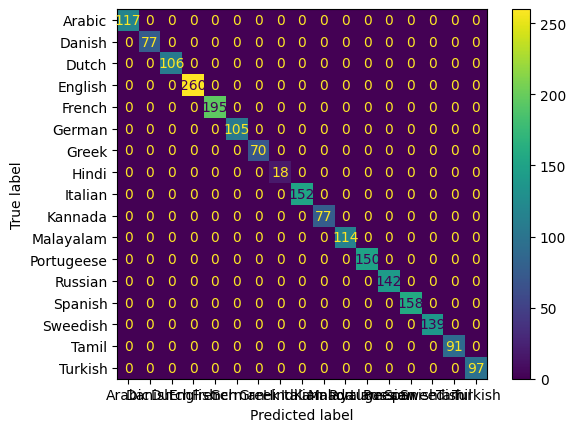

In [237]:
Bernauli(x_train, x_test, y_train, y_test)


In [238]:
df_credit = pd.read_csv(base_path + '/creditcard.csv')


In [239]:
x_train, x_test, y_train, y_test = eda(df_credit,'Class','a')


Label Count = 2
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
(284807, 31)


[[56859     2]
 [  100     1]]
Accuracy Of Model is 0.9982093325374811


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56861
           1       0.33      0.01      0.02       101

    accuracy                           1.00     56962
   macro avg       0.67      0.50      0.51     56962
weighted avg       1.00      1.00      1.00     56962



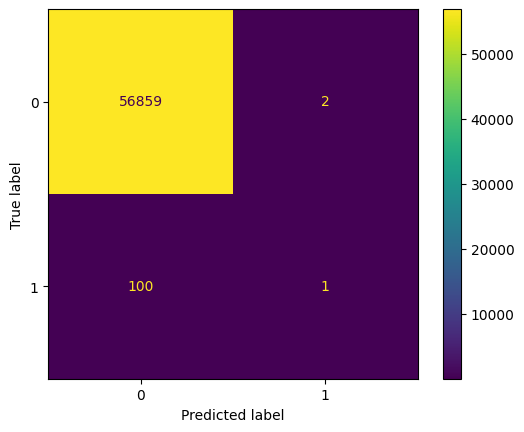

In [240]:
Bernauli(x_train, x_test, y_train, y_test)


In [241]:
df_Disease = pd.read_csv(base_path + '/MultipleDiseasePrediction.csv')


In [242]:
df_Disease.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [243]:
x_train, x_test, y_train, y_test = eda(df_Disease,'prognosis','a')


Label Count = 41
itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64
(4920, 133)


[[18  0  0 ...  0  0  0]
 [ 0 22  0 ...  0  0  0]
 [ 0  0 31 ...  0  0  0]
 ...
 [ 0  0  0 ... 20  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 24]]
Accuracy Of MOdel is 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        27
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        21
          10       1.00      1.00      1.00        34
          11       1.00      1.00      1.00        18
          12       1.00      1.00      1.00        22
          13       1.00      1.00      1.00        27
        

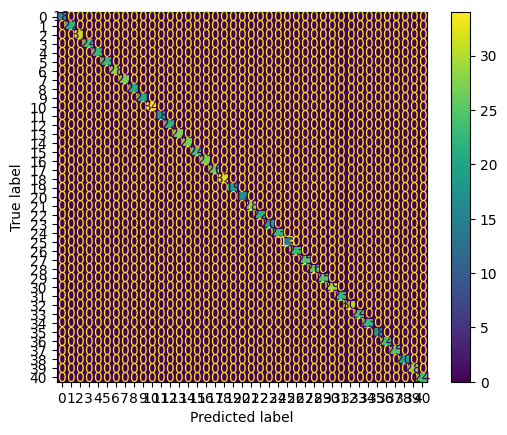

In [244]:
Multinomial(x_train, x_test, y_train, y_test)


In [245]:
df_Resume = pd.read_csv(base_path + '/Resume.csv')


In [246]:
df_Resume.head()


,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [247]:
df_Resume.drop(['ID'],axis=1,inplace=True)
df_Resume.drop(['Resume_str'],axis=1,inplace=True)


In [248]:
x_train, x_test, y_train, y_test = eda(df_Resume,'Category','b')


Label Count = 24


[[19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 16  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0

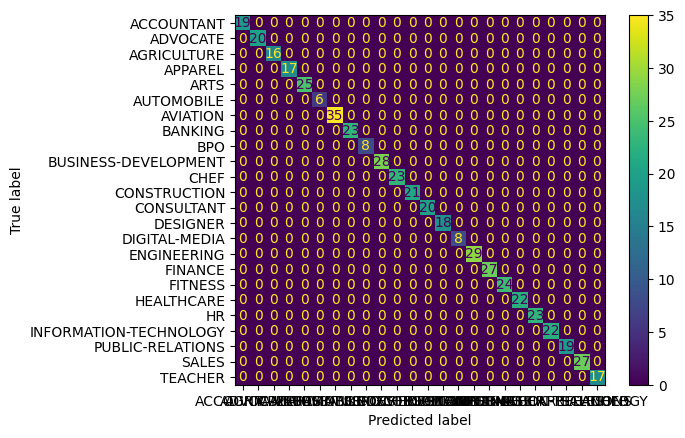

In [249]:
Multinomial(x_train, x_test, y_train, y_test)


In [250]:
df_MOvie = pd.read_csv(base_path + '/Movies Recommendation.csv')


In [251]:
df_MOvie.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Movie_ID                  4760 non-null   int64  
 1   Movie_Title               4760 non-null   object 
 2   Movie_Genre               4760 non-null   object 
 3   Movie_Language            4760 non-null   object 
 4   Movie_Budget              4760 non-null   int64  
 5   Movie_Popularity          4760 non-null   float64
 6   Movie_Release_Date        4760 non-null   object 
 7   Movie_Revenue             4760 non-null   int64  
 8   Movie_Runtime             4758 non-null   float64
 9   Movie_Vote                4760 non-null   float64
 10  Movie_Vote_Count          4760 non-null   int64  
 11  Movie_Homepage            1699 non-null   object 
 12  Movie_Keywords            4373 non-null   object 
 13  Movie_Overview            4757 non-null   object 
 14  Movie_Pr

In [256]:
x_train, x_test, y_train, y_test = eda(df_MOvie,'Movie_Popularity','a')


Label Count = 4759
Movie_ID                    0
Movie_Title                 0
Movie_Genre                 0
Movie_Language              0
Movie_Budget                0
Movie_Popularity            0
Movie_Release_Date          0
Movie_Revenue               0
Movie_Runtime               0
Movie_Vote                  0
Movie_Vote_Count            0
Movie_Homepage              0
Movie_Keywords              0
Movie_Overview              0
Movie_Production_House      0
Movie_Production_Country    0
Movie_Spoken_Language       0
Movie_Tagline               0
Movie_Cast                  0
Movie_Crew                  0
Movie_Director              0
dtype: int64
(4760, 21)


In [ ]:
# Multinomial(x_train, x_test, y_train, y_test)


ValueError: Unknown label type: (array([10.536092, 54.159392, 17.845161, ..., 19.836124,  2.175696,
       22.332927]),)

In [258]:
df_website = pd.read_csv(base_path + '/website_classification.csv')


In [259]:
df_website.head()


,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [261]:
x_train, x_test, y_train, y_test = eda(df_website,'Category','b')


Label Count = 16


[[ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 17  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 25  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 16  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 13  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 26  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 20  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 24  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 29]]
Accuracy Of MOdel is 1.0
                                 precision    recall  f1-score   support

                          Adult       1.00      1.00      1.00         2
           

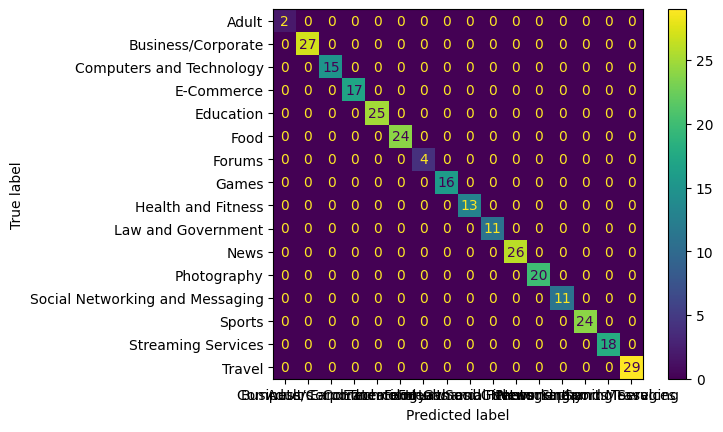

In [262]:
Multinomial(x_train, x_test, y_train, y_test)


In [265]:
df_Political = pd.read_csv(base_path + '/PolData.csv')  


In [266]:
df_Political.head()


,name,category,link,topics,country,region_africa,region_asia,region_easteurope,region_latinamerica,region_westeurope,...,file_excel,file_r,file_zip,variable_countryname,variable_year,variable_cow,doi_article,doi_dataset,revised,note
0,3P Anti-trafficking Policy Index,policy,https://www.awi.uni-heidelberg.de/professuren/...,"anti-trafficking, prosecution, protection, pre...",NaN,1.0,1.0,1.0,1.0,1.0,...,http://www.uni-heidelberg.de/md/awi/humantraff...,NaN,NaN,Country,Year,NaN,10.1111/sjoe.12055,NaN,20220815.0,NaN
1,A Comprehensive Dataset of U.S. Federal Laws,policy,https://doi.org/10.17605/OSF.IO/MRGHC,federal laws,US,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,10.1038/s41597-023-02758-z,10.17605/OSF.IO/MRGHC,20240303.0,NaN
2,A Lexicial Index of Electoral Democracy,democracy,https://doi.org/10.7910/DVN/29106,"political regimes, democratization, regime cha...",NaN,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,countryn,year,cow,10.1177/0010414015581050,10.7910/DVN/29106,20231104.0,NaN
3,A millennium of macroeconomic data,economics,https://www.bankofengland.co.uk/statistics/res...,"macroeconomics, finance",GB,0.0,0.0,0.0,0.0,0.0,...,https://www.bankofengland.co.uk/-/media/boe/fi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20201008.0,NaN
4,Abortion Law Database,policy,https://www.hsph.harvard.edu/david-canning/dat...,"abortion, criteria",NaN,1.0,1.0,1.0,1.0,1.0,...,NaN,NaN,NaN,ctr_name,year,NaN,10.1007/s10887-009-9039-9,NaN,20180529.0,NaN


In [269]:
x_train, x_test, y_train, y_test = eda(df_Political,'category','a')


Label Count = 0
name                    0
category                0
link                    0
topics                  0
country                 0
region_africa           0
region_asia             0
region_easteurope       0
region_latinamerica     0
region_westeurope       0
year_start              0
year_end                0
availability            0
registration            0
license                 0
file_codebook           0
file_csv                0
file_dta                0
file_sav                0
file_excel              0
file_r                  0
file_zip                0
variable_countryname    0
variable_year           0
variable_cow            0
doi_article             0
doi_dataset             0
revised                 0
note                    0
dtype: int64


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.